# Decision Tree Regression

In [55]:
from warnings import filterwarnings

filterwarnings("ignore")

### Step 1 - Data Ingestion
1. Read the training data

In [56]:
import pandas as pd

df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Column Names
1. AT - Atmospheric Temparture in Celsius
2. V - Vacuum Pressure in Pascals
3. AP - Atmospheric Pressure in Pascals
4. RH - Relative Humidity in %
5. PE - Power Output in MW
6. Target Feature


### Step 2 - Data Quality Checks

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [58]:
m = df.isna().sum()
m

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [59]:
df.duplicated().sum()

np.int64(41)

In [60]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

### Step 3 - Separate X & Y

In [61]:
X = df.drop(columns=["PE"])
Y = df[["PE"]]

In [62]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [63]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


AttributeError: Rectangle.set() got an unexpected keyword argument 'X'

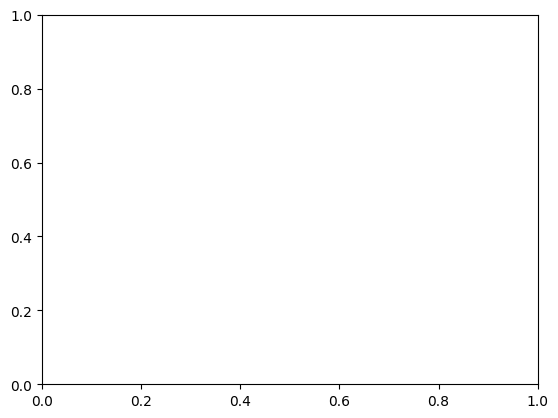

In [108]:
import seaborn as sns

sns.histplot(data=Y, X=["PE"], kde=True)

### Step 4 - Apply Preprocessing on X

In [ ]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler()).set_output(
    transform="pandas"
)

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Step 5 - Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.4, random_state=42
)

In [ ]:
xtrain.head()

,AT,V,AP,RH
8760,-1.394172,-1.005343,0.857362,0.448769
3952,0.048599,1.026876,-0.199839,0.205730
5323,0.427428,-0.334506,-1.287341,0.421384
2818,1.686159,1.104128,0.286676,-1.639992
6516,-0.649949,-0.765702,1.160382,0.105776


In [ ]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
ytrain.head()

,PE
8760,482.80
3952,445.31
5323,442.85
2818,429.66
6516,473.17


In [ ]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [ ]:
xtrain.shape

(5716, 4)

In [ ]:
xtest.shape

(3811, 4)

### Step 6 - Model Building

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
model = DecisionTreeRegressor(
    max_depth=2,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="squared_error",
    random_state=42,
)
model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [70]:
model.score(xtrain, ytrain)

0.8587240407743275

In [71]:
model.score(xtest, ytest)

0.8647853214936755

### Hyperparameter Tuning
1. In Regression, Use R2 Score
2. In Classification, Use f1_marco

Techniques
1. GridSearchCV --> Will Check all possible combinations
2. RandomisedSearchCV --> Will Randomly Select Parameters for given repitions

In [73]:
params = {
    "max_depth": [5, 6, 7, 8, 9, 10],
    "min_samples_split": [5, 6, 7],
    "min_samples_leaf": [5, 6, 7],
    "criterion": ["squared_error", "absolute_error"],
}
params

{'max_depth': [5, 6, 7, 8, 9, 10],
 'min_samples_split': [5, 6, 7],
 'min_samples_leaf': [5, 6, 7],
 'criterion': ['squared_error', 'absolute_error']}

### GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor(random_state=42)
gscv_dtr = GridSearchCV(
    estimator=dtr,
    param_grid=params,
    scoring="r2",
    cv=5,
    n_jobs=-1,
)
gscv_dtr.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [5, 6, 7]},
             scoring='r2')

In [75]:
gscv_dtr.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [76]:
gscv_dtr.best_score_

np.float64(0.9377138730483496)

### RandomSearchCV

In [78]:
from sklearn.model_selection import RandomizedSearchCV

rscv_dtr = RandomizedSearchCV(
    estimator=dtr,
    param_distributions=params,
    scoring="r2",
    cv=5,
    n_jobs=-1,
)
rscv_dtr.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [5, 6, 7],
                                        'min_samples_split': [5, 6, 7]},
                   scoring='r2')

In [81]:
rscv_dtr.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_depth': 8,
 'criterion': 'squared_error'}

In [82]:
rscv_dtr.best_score_

np.float64(0.9370769524649258)

### COmparing RandomSearch and GridSearch, GridSearch is marginally better

In [79]:
best_dtr = gscv_dtr.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

### Step 7 - Model Evaluation

In [83]:
best_dtr.score(xtrain, ytrain)

0.9618328755650226

In [84]:
best_dtr.score(xtest, ytest)

0.945347680710823

In [85]:
ypred_test = best_dtr.predict(xtest)
ypred_test[0:5]

array([434.03430233, 481.5652381 , 472.01125   , 450.58923077,
       448.985     ])

In [86]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [87]:
def evaluate_model(model, x, y):
    # Predicted the results
    ypred = model.predict(x)

    # Evaluate metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [88]:
print("Train Results : ")
evaluate_model(best_dtr, xtrain, ytrain)

Train Results : 
RMSE : 3.32
MAE : 2.40
MAPE : 0.53%
R2 : 96.18%


In [89]:
print("Test Results : ")
evaluate_model(best_dtr, xtest, ytest)

Test Results : 
RMSE : 4.00
MAE : 3.01
MAPE : 0.66%
R2 : 94.53%


### Step 8 - Plotting and Feature Importance

In [90]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.4705473098330241, 0.95, 'AT <= -0.248\nsquared_error = 288.293\nsamples = 5716\nvalue = 454.28'),
 Text(0.22895408163265307, 0.85, 'AT <= -1.062\nsquared_error = 87.814\nsamples = 2350\nvalue = 471.479'),
 Text(0.34975069573283857, 0.8999999999999999, 'True  '),
 Text(0.11044758812615955, 0.75, 'AT <= -1.499\nsquared_error = 43.908\nsamples = 1028\nvalue = 479.369'),
 Text(0.06621057513914656, 0.65, 'AT <= -1.694\nsquared_error = 32.593\nsamples = 427\nvalue = 483.752'),
 Text(0.03525046382189239, 0.55, 'V <= -1.089\nsquared_error = 28.802\nsamples = 235\nvalue = 485.586'),
 Text(0.021799628942486084, 0.45, 'V <= -1.123\nsquared_error = 34.993\nsamples = 142\nvalue = 486.766'),
 Text(0.013914656771799629, 0.35, 'V <= -1.175\nsquared_error = 33.064\nsamples = 124\nvalue = 485.91'),
 Text(0.0074211502782931356, 0.25, 'V <= -1.185\nsquared_error = 9.977\nsamples = 83\nvalue = 487.089'),
 Text(0.0037105751391465678, 0.15, 'AT <= -1.944\nsquared_error = 8.288\nsamples = 65\nvalue = 

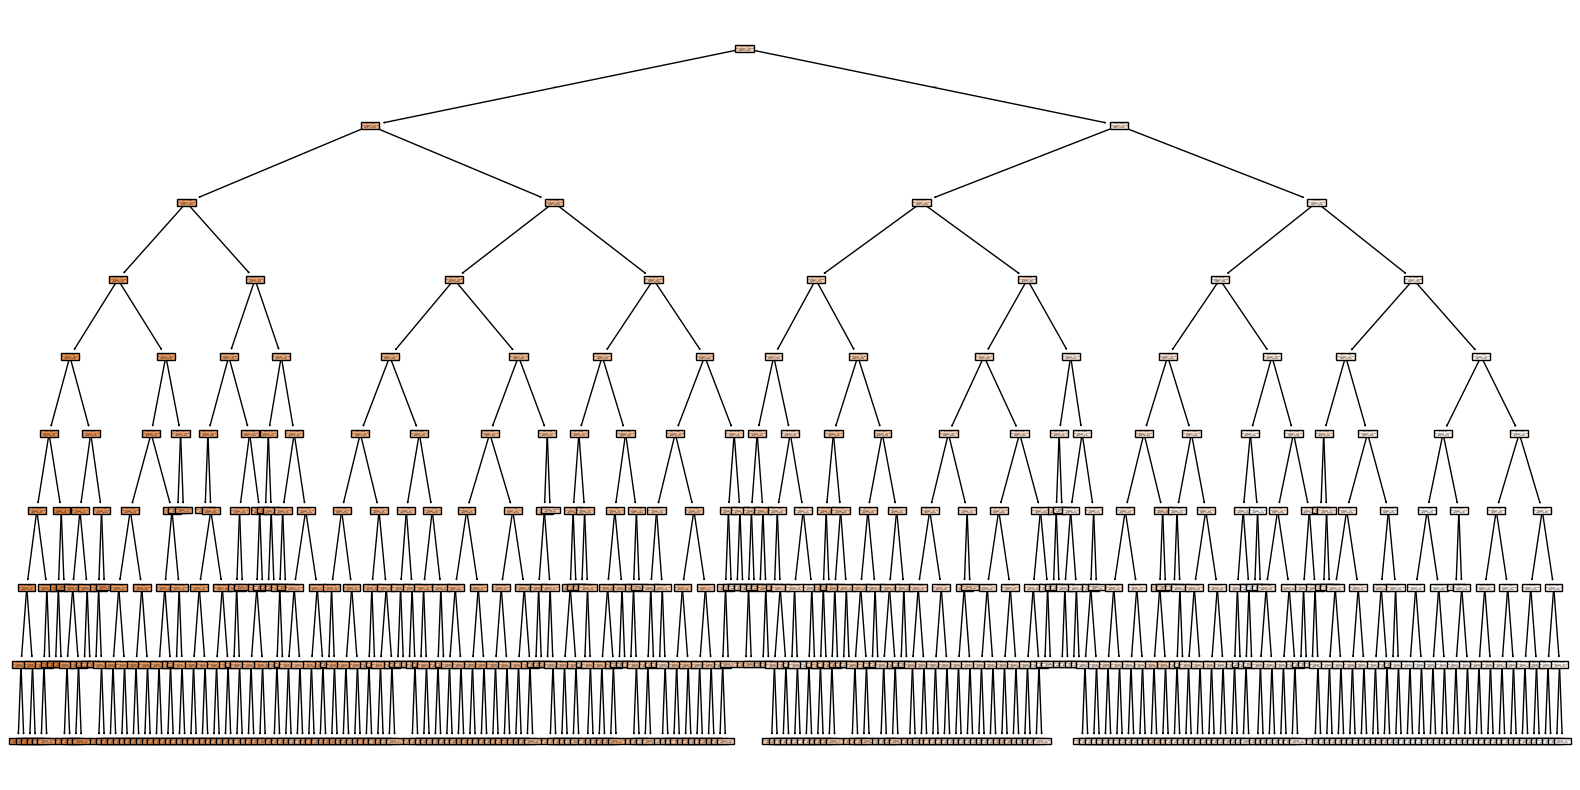

In [ ]:
# plt.figure has to be called before plot_tree to set the figure size
plt.figure(figsize=(20, 10))
plot_tree(
    best_dtr,
    feature_names=xtrain.columns,  # Use the feature names from the training set
    filled=True,  # Fill the nodes with colors based on the class
)

[Text(0.5, 0.9, 'AT <= -0.248\nsquared_error = 288.293\nsamples = 5716\nvalue = 454.28'),
 Text(0.25, 0.7, 'AT <= -1.062\nsquared_error = 87.814\nsamples = 2350\nvalue = 471.479'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'AT <= -1.499\nsquared_error = 43.908\nsamples = 1028\nvalue = 479.369'),
 Text(0.0625, 0.3, 'AT <= -1.694\nsquared_error = 32.593\nsamples = 427\nvalue = 483.752'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'RH <= 1.28\nsquared_error = 28.609\nsamples = 601\nvalue = 476.256'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'AT <= -0.635\nsquared_error = 35.899\nsamples = 1322\nvalue = 465.343'),
 Text(0.3125, 0.3, 'AT <= -0.794\nsquared_error = 23.887\nsamples = 776\nvalue = 468.182'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'V <= -0.742\nsquared_error = 25.235\nsamples = 546\nvalue = 461.308'),
 Text(0.40625

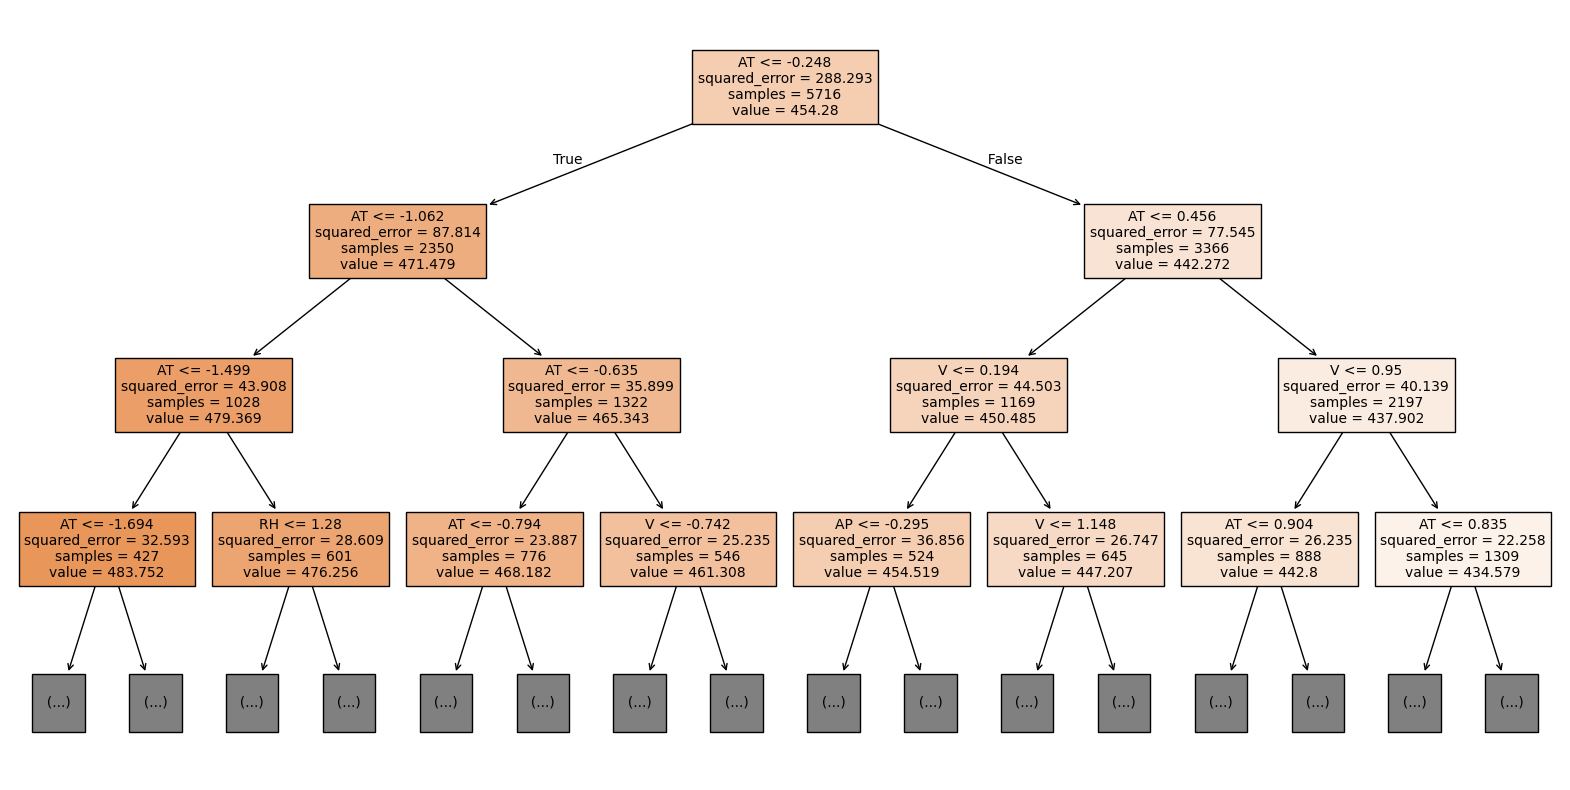

In [94]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_dtr,
    feature_names=xtrain.columns,  # Use the feature names from the training set
    filled=True,  # Fill the nodes with colors based on the class
    max_depth=3,  # Limit the depth of the tree for better visualization
    fontsize=10,  # Adjust the font size for better readability
)

In [95]:
best_dtr.feature_importances_

array([0.92758791, 0.05167463, 0.01107093, 0.00966652])

In [96]:
xtrain.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [99]:
imp = pd.Series(
    best_dtr.feature_importances_,
    index=xtrain.columns,
).sort_values(ascending=False)
imp

# This will show the importance of each feature in the model
# It is useful to understand which features are contributing the most to the predictions

AT    0.927588
V     0.051675
AP    0.011071
RH    0.009667
dtype: float64

Text(0.5, 0, 'Features')

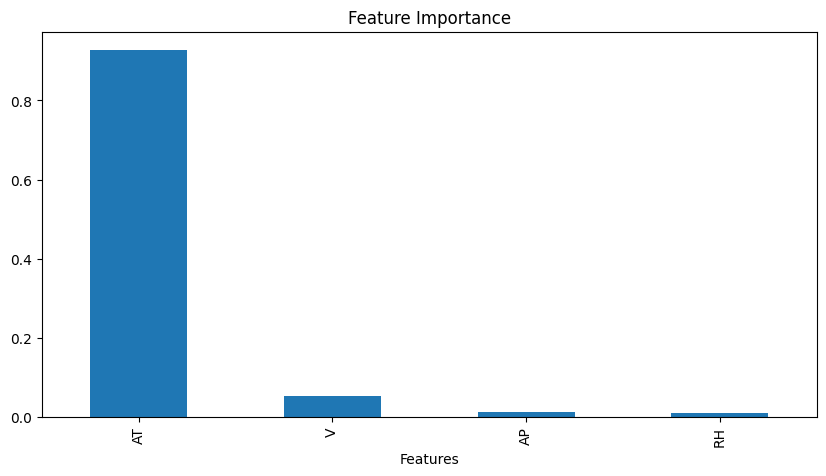

In [101]:
imp.plot(kind="bar", title="Feature Importance", figsize=(10, 5))
plt.xlabel("Features")

### Step 9 - Out of Sample Prediction

In [102]:
xnew = pd.read_csv("test_PowerPlant.csv")
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [103]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [104]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [105]:
preds = best_dtr.predict(xnew_pre)
preds[0:5]

array([443.80102041, 437.85133333, 432.53222222, 440.70269231,
       473.42666667])

In [107]:
xnew["PE_pred"] = preds.round(2)
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,443.80
1,28.88,54.89,1007.16,46.60,437.85
2,27.89,73.21,1001.32,85.88,432.53
3,25.69,62.26,1011.38,74.08,440.70
4,12.16,40.81,1025.79,70.97,473.43
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,434.07
96,11.78,39.96,1011.37,82.95,477.50
97,5.62,41.38,1020.91,86.21,487.91
98,24.96,74.99,1008.25,80.52,435.69


In [109]:
xnew.to_csv("DTR_Results.csv", index=False)

### Step 9 - Save and Load

In [110]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [111]:
best_dtr

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [114]:
import joblib

joblib.dump(num_pipe, "pre.joblib")
joblib.dump(best_dtr, "dtr_model.joblib")

['dtr_model.joblib']

In [115]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [116]:
m = joblib.load("dtr_model.joblib")
m

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [117]:
m.score(xtrain, ytrain)

0.9618328755650226

In [118]:
m.score(xtest, ytest)

0.945347680710823